O objetivo é entender melhor a estrutura dos dados, identificar padroes e possíveis insights relevantes para a modelagem.

Este notebook consome o CSV já pré‑processado em `data/imdb_preprocessado.csv` e gera:

1. Verificar a distribuicao dos sentimentos 
2. comprimento das reviews
3. Visualizar as palavras mais frequentes por classe
4. Nuvem de palavras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%pip install wordcloud
from wordcloud import WordCloud

# 1. Leitura do dataset pre‑processado

df = pd.read_csv('../../data/imdb_preprocessado.csv')

Note: you may need to restart the kernel to use updated packages.


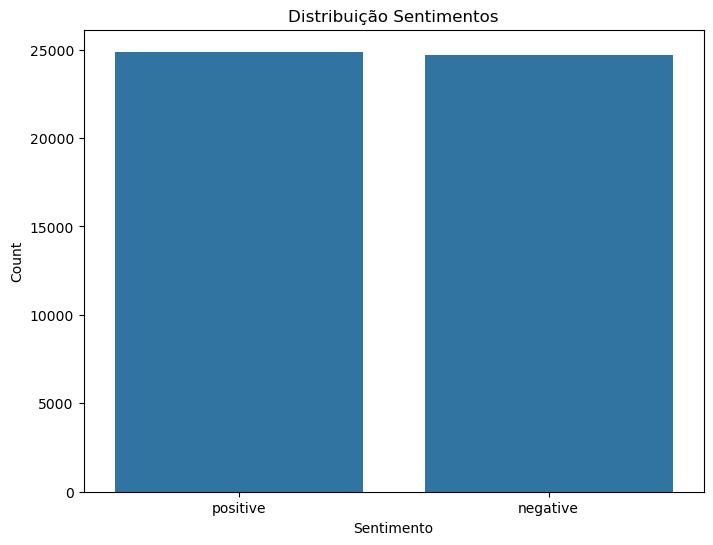

In [2]:
# 2. Distribuição de sentimentos
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribuição Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Count')
plt.show()

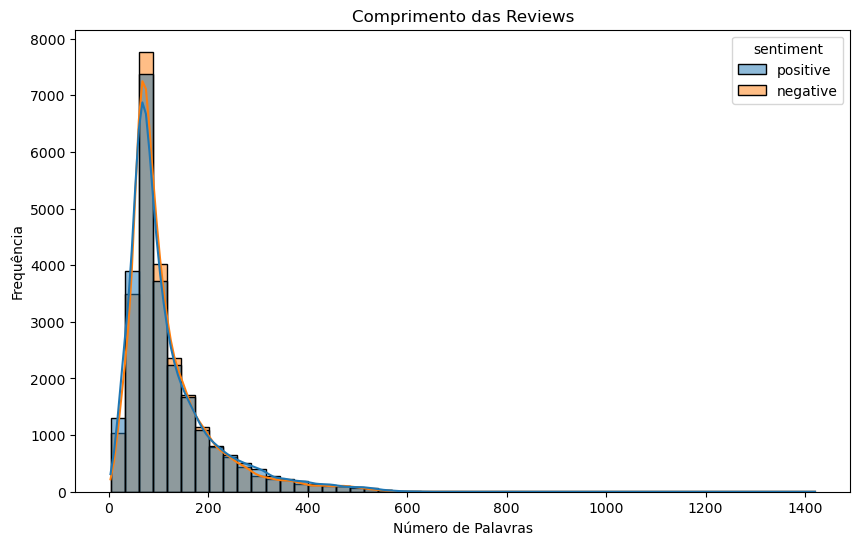

In [3]:
# 3. Comprimento das reviews
df['review_length'] = df['processed_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title('Comprimento das Reviews')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.show()

C:\Users\guilh\AppData\Local\Temp\ipykernel_7228\1800682660.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[c for w,c in top_pos], y=[w for w,c in top_pos], palette='Greens_r')
C:\Users\guilh\AppData\Local\Temp\ipykernel_7228\1800682660.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[c for w,c in top_neg], y=[w for w,c in top_neg], palette='Reds_r')


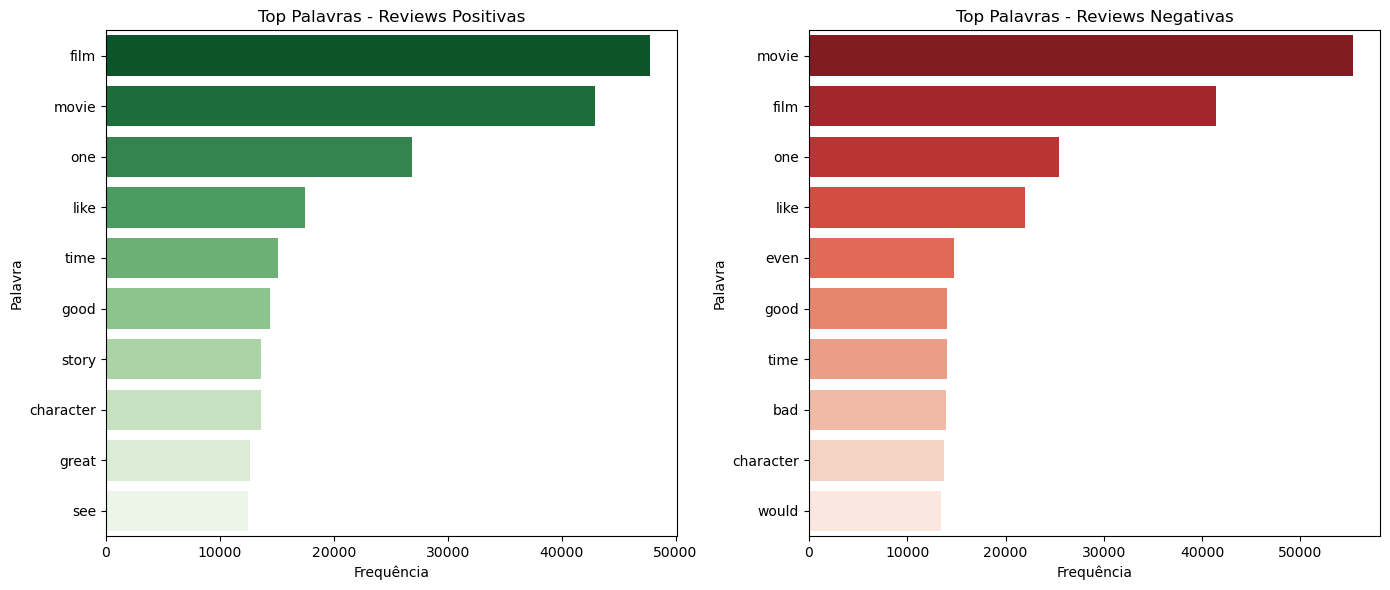

In [4]:
# 4. Top palavras por sentimento
reviews_pos = df[df['sentiment']=='positive']['processed_review']
reviews_neg = df[df['sentiment']=='negative']['processed_review']

text_pos = ' '.join(reviews_pos)
text_neg = ' '.join(reviews_neg)

counter_pos = Counter(text_pos.split())
counter_neg = Counter(text_neg.split())

top_pos = counter_pos.most_common(10)
top_neg = counter_neg.most_common(10)

plt.figure(figsize=(14, 6))

# positivas
plt.subplot(1, 2, 1)
sns.barplot(x=[c for w,c in top_pos], y=[w for w,c in top_pos], palette='Greens_r')
plt.title('Top Palavras - Reviews Positivas')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

# negativas
plt.subplot(1, 2, 2)
sns.barplot(x=[c for w,c in top_neg], y=[w for w,c in top_neg], palette='Reds_r')
plt.title('Top Palavras - Reviews Negativas')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

plt.tight_layout()
plt.show()

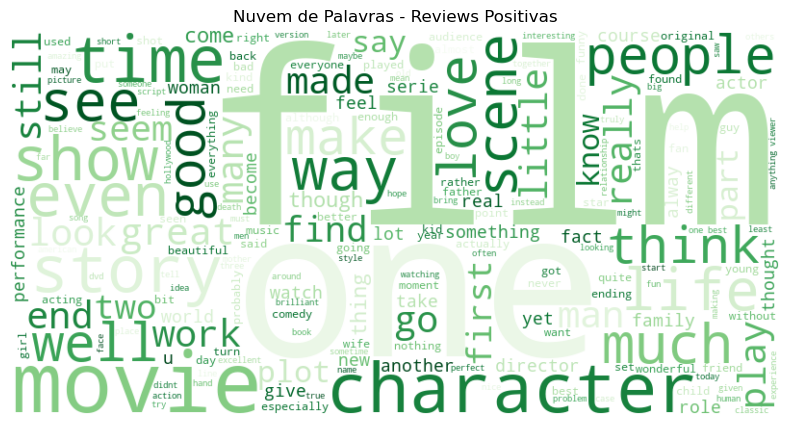

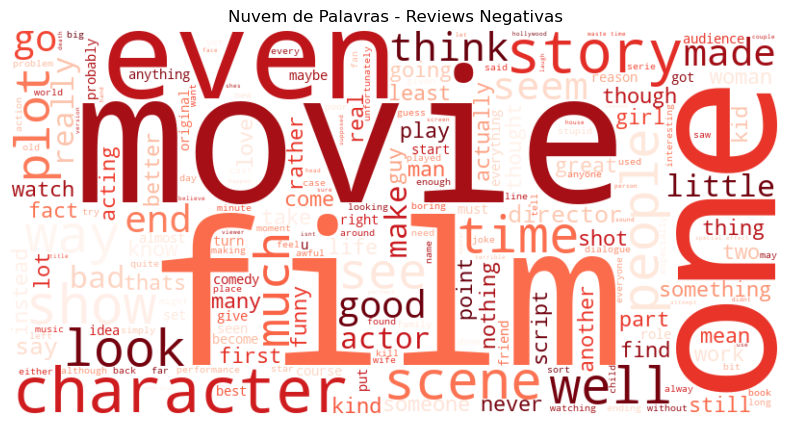

In [5]:
# 5. Nuvem de palavras
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens')\
    .generate(text_pos)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Reviews Positivas')
plt.show()

wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds')\
    .generate(text_neg)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Reviews Negativas')
plt.show()